# 错误版本

In [5]:
import random 

times = 1000
options = ['A','B','C','D']
result1 = {'win':0,'failure':0}

fir_answer = random.choice(options)#以我们的视角 随机选一个答案
tmp_option = options.copy()
tmp_option.remove(fir_answer)#记录剩余答案
wrong = random.choice(tmp_option) #严重错误 主持人是提前知道答案的，而不是随机选一个
options.remove(wrong)
aware_options = options.copy()
aware_options.remove(fir_answer)

for i in range(times):
    answer = random.choice(options)
    end_answer = random.choice(aware_options)
    if end_answer == answer:
        result1['win']+=1
    else:
        result1['failure']+=1
print("Times of win =%d,times of failure =%d,The pro of win =%.4f,The pro of failure =%04f"%(result1['win'],result1['failure'],result1['win']/times,result1['failure']/times))

Times of win =355,times of failure =645,The pro of win =0.3550,The pro of failure =0.645000


# 正确版本

In [14]:
import random 

times = 10000000
options = ['A','B','C','D']
result1 = {'win':0,'failure':0}

for i in range(times):
    answer = random.choice(options)#首先确定答案
    fir_answer = random.choice(options)#随机选择我们的答案
    tmp_option = options.copy()#创建存储选择
    tmp_option.remove(fir_answer)#余下选择
    if fir_answer!=answer:#我们的答案和答案不服
        tmp_option.remove(answer)#从余下的两个当中去除答案：因为主持人的视角只能选择非答案且非我们的内容，如果我们和答案相同，那么是三选一，如果我们和答案不同才需要二选一
    wrong = random.choice(tmp_option)#依旧重复最重要的逻辑：主持人的视角只能选择非答案且非我们的内容，如果我们和答案相同，那么是三选一，如果我们和答案不同才需要二选一
    aware_options = options.copy()
    aware_options.remove(wrong)
    aware_options.remove(fir_answer)
    end_answer = random.choice(aware_options)
    
    if end_answer == answer:
        result1['win']+=1
    else:
        result1['failure']+=1
print("Times of win =%d,times of failure =%d,The pro of win =%.4f,The pro of failure =%04f"%(result1['win'],result1['failure'],result1['win']/times,result1['failure']/times))

Times of win =3748641,times of failure =6251359,The pro of win =0.3749,The pro of failure =0.625136


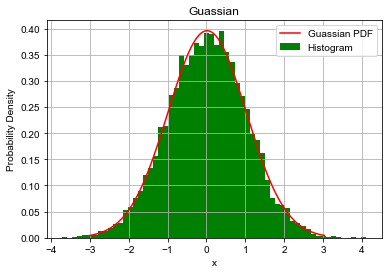

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import math
from matplotlib import rcParams

rcParams['font.family'] = 'Arial Unicode MS'

guassian_data = np.random.randn(10000)

Mean = guassian_data.mean()
Var = math.sqrt(guassian_data.var())

plt.hist(guassian_data, bins=60, density=True, color ='g', label='Histogram')

x=np.linspace((Mean-3*Var),(Mean+3*Var),1000)
pdf=(1/np.sqrt(2*np.pi*(Var**2))*np.exp(-(x-Mean)**2/(2*Var**2)))
plt.plot(x,pdf,color = 'r',label = 'Guassian PDF')

plt.title('Guassian')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

In [1]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.stats import shapiro


def generate_data(n_samples=100):

    X = np.random.normal(0, 1, (n_samples, 1))  
    y = 3 * X * X + np.random.normal(0, 1, (n_samples, 1)) 
    return X, y

def generate_data_test(n_samples=100):
    X = np.random.normal(0, 1, (n_samples, 1))
    y = 3 * X * X
    return X,y


def calculate_errors(X_train, X_test, y_train, y_test):
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_error = mean_squared_error(y_train, y_train_pred)
    generalization_error = mean_squared_error(y_test, y_test_pred)
    
    return train_error, generalization_error


n_samples = 100000  
n_experiments = 9999  
generalization_errors = []

for _ in tqdm(range(n_experiments), desc="Running experiments"):
    X, y = generate_data(n_samples)
    X_test , y_test = generate_data_test(n_samples)
    train_error, generalization_error = calculate_errors(X, X_test, y, y_test)
    generalization_errors.append(generalization_error)

plt.hist(generalization_errors, bins=30, density=True, alpha=0.6, color='g')
plt.title('Distribution of Generalization Errors')
plt.xlabel('Generalization Error')
plt.ylabel('Frequency')
plt.show()


stat, p_value = shapiro(generalization_errors)
print(f"Shapiro-Wilk Test: Stat = {stat:.4f}, p-value = {p_value:.4f}")

# 如果 p-value > 0.05，说明数据可以认为符合正态分布
if p_value > 0.05:
    print("The generalization errors follow a normal distribution.")
else:
    print("The generalization errors do not follow a normal distribution.")


Running experiments: 100%|█████████████████████████████████████████████████████████| 9999/9999 [01:58<00:00, 84.72it/s]


<Figure size 640x480 with 1 Axes>

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Shapiro-Wilk Test: Stat = 0.9999, p-value = 0.8187
The generalization errors follow a normal distribution.
